In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [69]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# which store has maximum sales ?

In [70]:
#calculate total sales firstly

total_sales = data.groupby('Store')['Weekly_Sales'].sum().round()
total_sales

Store
1     222402809.0
2     275382441.0
3      57586735.0
4     299543953.0
5      45475689.0
6     223756131.0
7      81598275.0
8     129951181.0
9      77789219.0
10    271617714.0
11    193962787.0
12    144287230.0
13    286517704.0
14    288999911.0
15     89133684.0
16     74252425.0
17    127782139.0
18    155114734.0
19    206634862.0
20    301397792.0
21    108117879.0
22    147075649.0
23    198750618.0
24    194016021.0
25    101061179.0
26    143416394.0
27    253855917.0
28    189263681.0
29     77141554.0
30     62716885.0
31    199613906.0
32    166819246.0
33     37160222.0
34    138249763.0
35    131520672.0
36     53412215.0
37     74202740.0
38     55159626.0
39    207445542.0
40    137870310.0
41    181341935.0
42     79565752.0
43     90565435.0
44     43293088.0
45    112395341.0
Name: Weekly_Sales, dtype: float64

In [71]:
total_sales.sort_values(ascending = False)

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

# Which store has maximum standard deviation?

In [72]:
std_dev = data.groupby('Store')['Weekly_Sales'].std().round()
std_dev

Store
1     155981.0
2     237684.0
3      46320.0
4     266201.0
5      37738.0
6     212526.0
7     112585.0
8     106281.0
9      69029.0
10    302262.0
11    165834.0
12    139167.0
13    265507.0
14    317570.0
15    120539.0
16     85770.0
17    112163.0
18    176642.0
19    191723.0
20    275901.0
21    128753.0
22    161251.0
23    249788.0
24    167746.0
25    112977.0
26    110431.0
27    239930.0
28    181759.0
29     99120.0
30     22810.0
31    125856.0
32    138017.0
33     24133.0
34    104630.0
35    211243.0
36     60725.0
37     21837.0
38     42768.0
39    217466.0
40    119002.0
41    187907.0
42     50263.0
43     40598.0
44     24763.0
45    130169.0
Name: Weekly_Sales, dtype: float64

In [73]:
std_dev.sort_values(ascending = False)

Store
14    317570.0
10    302262.0
20    275901.0
4     266201.0
13    265507.0
23    249788.0
27    239930.0
2     237684.0
39    217466.0
6     212526.0
35    211243.0
19    191723.0
41    187907.0
28    181759.0
18    176642.0
24    167746.0
11    165834.0
22    161251.0
1     155981.0
12    139167.0
32    138017.0
45    130169.0
21    128753.0
31    125856.0
15    120539.0
40    119002.0
25    112977.0
7     112585.0
17    112163.0
26    110431.0
8     106281.0
34    104630.0
29     99120.0
16     85770.0
9      69029.0
36     60725.0
42     50263.0
3      46320.0
38     42768.0
43     40598.0
5      37738.0
44     24763.0
33     24133.0
30     22810.0
37     21837.0
Name: Weekly_Sales, dtype: float64

# Also, find out the coefficient of mean to standard deviation

In [74]:
store = data[data.Store == 14].Weekly_Sales
store

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

In [75]:
mean_std = (store.std()/store.mean())*100
mean_std

15.713673600948338

# Which store/s has good quarterly growth rate in Q3’2012



In [76]:
# changing the data type from object to datetime
data['Date'] = pd.to_datetime(data['Date']);

In [77]:
# calculating sales in the second quarter i.e. date 1-4-2012 to 30-06-2012

q2_sales = data[(data['Date']>='2012-4-1') & (data['Date']<='2012-6-30')].groupby('Store')['Weekly_Sales'].sum().round()
q2_sales

Store
1     21036966.0
2     25085124.0
3      5562668.0
4     28384185.0
5      4427262.0
6     20728970.0
7      7613594.0
8     11934276.0
9      7431320.0
10    23598434.0
11    17879096.0
12    13193365.0
13    26803226.0
14    24427769.0
15     7867952.0
16     6626133.0
17    12918892.0
18    13834706.0
19    18315279.0
20    27550181.0
21     9226280.0
22    13329065.0
23    18283425.0
24    17768192.0
25     9247467.0
26    13218290.0
27    22593641.0
28    16986000.0
29     7034493.0
30     5786335.0
31    18249155.0
32    15415236.0
33     3512138.0
34    12858028.0
35    10753571.0
36     4090379.0
37     6859778.0
38     5732363.0
39    20191586.0
40    12849747.0
41    17560036.0
42     7608247.0
43     8239793.0
44     4322555.0
45    10278900.0
Name: Weekly_Sales, dtype: float64

In [78]:
# calculating sales in the third quarter i.e. date 1-7-2012 to 30-9-2012

q3_sales = data[(data['Date']>='2012-7-1') & (data['Date']<='2012-9-30')].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales

Store
1     18633210.0
2     22396868.0
3      4966496.0
4     25652119.0
5      3880622.0
6     18341221.0
7      7322394.0
8     10873860.0
9      6528240.0
10    21169356.0
11    16094363.0
12    11777508.0
13    24319994.0
14    20140430.0
15     6909374.0
16     6441311.0
17    11533998.0
18    12507522.0
19    16644341.0
20    24665938.0
21     8403508.0
22    11818544.0
23    17103654.0
24    16126000.0
25     8309440.0
26    12417575.0
27    20191238.0
28    15055660.0
29     6127862.0
30     5181974.0
31    16454328.0
32    14142165.0
33     3177072.0
34    11476259.0
35    10252123.0
36     3578124.0
37     6250524.0
38     5129298.0
39    18899955.0
40    11647661.0
41    16373588.0
42     6830840.0
43     7376726.0
44     4020486.0
45     8851242.0
Name: Weekly_Sales, dtype: float64

In [79]:
# calculating growth
difference = q3_sales - q2_sales
growth_rate = (difference/q2_sales)*100

In [80]:
growth_rate.sort_values(ascending=False)

Store
16    -2.789289
7     -3.824738
35    -4.663084
26    -6.057629
39    -6.396877
23    -6.452681
41    -6.756524
44    -6.988205
32    -8.258524
37    -8.881541
8     -8.885466
21    -8.917700
19    -9.123192
24    -9.242313
13    -9.264676
40    -9.354939
33    -9.540229
18    -9.593149
4     -9.625311
31    -9.835124
11    -9.982233
25   -10.143610
42   -10.217952
10   -10.293386
30   -10.444625
20   -10.469053
43   -10.474377
38   -10.520356
27   -10.633094
2    -10.716535
3    -10.717375
17   -10.719913
12   -10.731584
34   -10.746352
22   -11.332535
28   -11.364300
1    -11.426344
6    -11.518898
9    -12.152350
15   -12.183323
5    -12.347135
36   -12.523412
29   -12.888363
45   -13.889210
14   -17.551087
Name: Weekly_Sales, dtype: float64

# Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [81]:
# mentioning the holiday events

Super_Bowl=['12-02-2010','11-02-2011','10-02-2012']
labour_Day=['10-09-2010','09-09-2011','07-09-2012']
Thanks_giving=['26-11-2010','25-11-2011','23-11-2012']
Chirstmas=['31-12-2010','30-12-2011','28-12-2012']

In [82]:
# calculating sales at holidays

Super_Bowl_Sales = data[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean()
labour_Day_Sales = data[data.Date.isin(labour_Day)]['Weekly_Sales'].mean()
Thanks_giving_Sales = data[data.Date.isin(Thanks_giving)]['Weekly_Sales'].mean()
Chirstmas_Sales = data[data.Date.isin(Chirstmas)]['Weekly_Sales'].mean()

In [83]:
print(Super_Bowl_Sales)
print(labour_Day_Sales)
print(Thanks_giving_Sales)
print(Chirstmas_Sales)

1079127.9877037033
1042427.2939259257
1471273.427777778
960833.1115555551


In [84]:
# calculating non-holiday sales
non_hldy = data[(data['Holiday_Flag']==0)]['Weekly_Sales'].mean()
non_hldy

1041256.3802088564

In [85]:
compare = pd.DataFrame([{'super bowl':Super_Bowl_Sales,'labour day':labour_Day_Sales,'thanks giving':Thanks_giving_Sales,'christmas':Chirstmas_Sales,'non-holiday':non_hldy}])
compare.round()


,super bowl,labour day,thanks giving,christmas,non-holiday
0,1079128.0,1042427.0,1471273.0,960833.0,1041256.0


# Provide a monthly and semester view of sales in units and give insights

In [86]:
data['day'] = pd.DatetimeIndex(data['Date']).day
data['month'] = pd.DatetimeIndex(data['Date']).month
data['year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


<BarContainer object of 6435 artists>

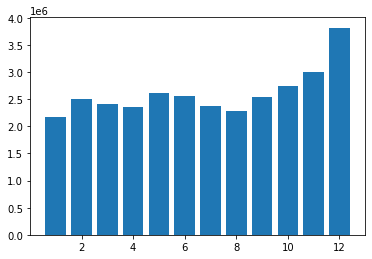

In [87]:
# for the view of sales, we can use bargraph

plt.figure
plt.bar(data['month'],data['Weekly_Sales'])


<AxesSubplot:xlabel='year'>

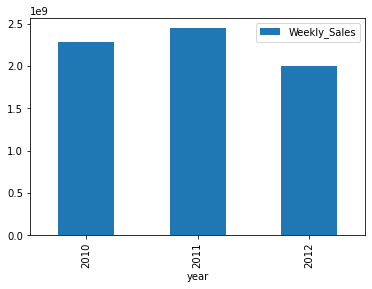

In [88]:
plt.figure
data.groupby('year')[['Weekly_Sales']].sum().plot(kind='bar')



# Statistical Model

In [89]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='CPI'>

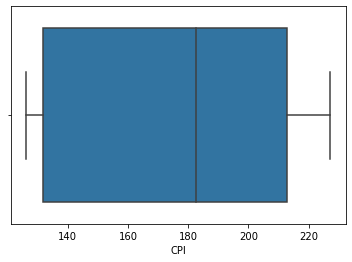

In [90]:
# detecting outliers of temperature,

sns.boxplot(data['CPI'])

<AxesSubplot:xlabel='Unemployment'>

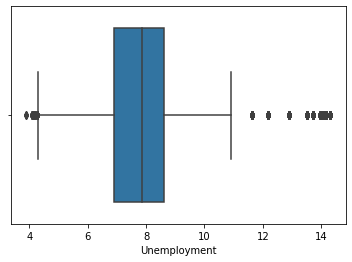

In [91]:
sns.boxplot(data['Unemployment'])

<AxesSubplot:xlabel='Fuel_Price'>

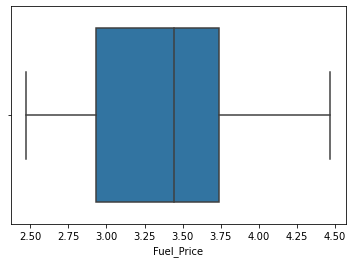

In [92]:
sns.boxplot(data['Fuel_Price'])

In [93]:
# as there are only outliers in unemployment column, we remove that outliers

Q1 = np.percentile(data['Unemployment'],25,interpolation='midpoint')
Q3 = np.percentile(data['Unemployment'],75,interpolation='midpoint')

In [94]:
IQR = Q3-Q1

In [95]:
upper = np.where(data['Unemployment']>=(Q3+1.5*IQR))
lower = np.where(data['Unemployment']<=(Q1-1.5*IQR))

In [96]:
data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)

<AxesSubplot:xlabel='Unemployment'>

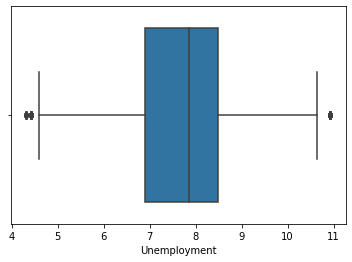

In [97]:
sns.boxplot(data['Unemployment'])

# splitting and applying linear regression

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
from sklearn.model_selection import train_test_split
x = data[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
y = data['Weekly_Sales']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state =100)

In [100]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [101]:
reg.fit(train_x, train_y)
y_pred = reg.predict(test_x)
y_pred

array([1280014.0390154 , 1397533.11069405,  909874.88137622, ...,
       1020590.94740969,  872739.47541055, 1246392.53984083])

In [102]:
#metrics

print('Accuracy:',reg.score(train_x, train_y)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))


Accuracy: 13.516689405253757
Mean Absolute Error: 451669.13856287336
Mean Squared Error: 295509964626.10516
Root Mean Squared Error: 543608.2823376638


<AxesSubplot:ylabel='Weekly_Sales'>

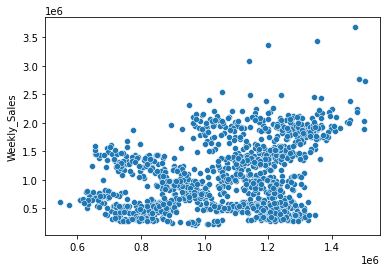

In [103]:
sns.scatterplot(y_pred,test_y)

# random forest regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rfr = RandomForestRegressor() 
rfr.fit(train_x, train_y)
Y_pred = rfr.predict(test_x)
Y_pred

array([1601324.0968, 2221883.9804,  740836.7872, ..., 1643007.2957,
       1410754.6635,  310025.8102])

In [107]:
import warnings
warnings.filterwarnings('ignore')

Accuracy: 99.27559207599063
Mean Absolute Error: 451669.13856287336
Mean Squared Error: 295509964626.10516
Root Mean Squared Error: 543608.2823376638


<AxesSubplot:ylabel='Weekly_Sales'>

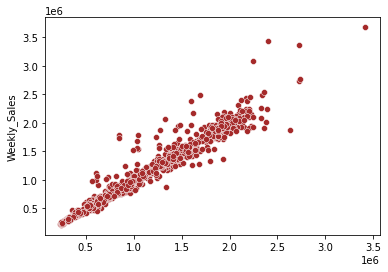

In [108]:
print('Accuracy:',rfr.score(train_x, train_y)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
sns.scatterplot(Y_pred, test_y, color='Brown')